In [71]:
import pandas as pd
import numpy as np
import math
import matplotlib as plt

In [72]:
raw = pd.read_csv('tr_eikon_eod_data.csv',
index_col=0, parse_dates=True).dropna()

In [73]:
raw

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-25,156.410000,78.630,40.78,972.91,241.71,255.29,2557.15,11.23,1.1812,1277.01,22.83,121.35
2017-10-26,157.410000,78.760,41.35,972.43,241.72,255.62,2560.40,11.30,1.1650,1266.73,22.43,120.33
2017-10-27,163.050000,83.810,44.40,1100.95,241.71,257.71,2581.07,9.80,1.1608,1272.60,22.57,120.90


In [74]:
symbols = ['SPY', 'GLD', 'AAPL.O', 'MSFT.O']

In [75]:
data = raw[symbols]
data = data.dropna()

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     1972 non-null   float64
 1   GLD     1972 non-null   float64
 2   AAPL.O  1972 non-null   float64
 3   MSFT.O  1972 non-null   float64
dtypes: float64(4)
memory usage: 77.0 KB


In [77]:
data.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,113.33,109.80,30.572827,30.950
2010-01-05,113.63,109.70,30.625684,30.960
2010-01-06,113.71,111.51,30.138541,30.770
2010-01-07,114.19,110.82,30.082827,30.452
2010-01-08,114.57,111.37,30.282827,30.660


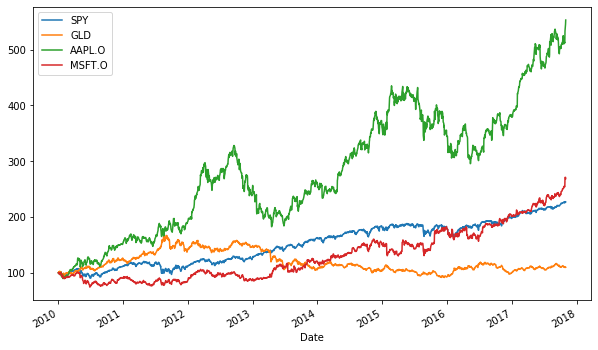

In [78]:
(data / data.iloc[0] * 100).plot(figsize=(10, 6))

In [79]:
log_returns = np.log(data / data.shift(1))

In [80]:
log_returns.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.002644,-0.000911,0.001727,0.000323
2010-01-06,0.000704,0.016365,-0.016034,-0.006156
2010-01-07,0.004212,-0.006207,-0.001850,-0.010389
2010-01-08,0.003322,0.004951,0.006626,0.006807


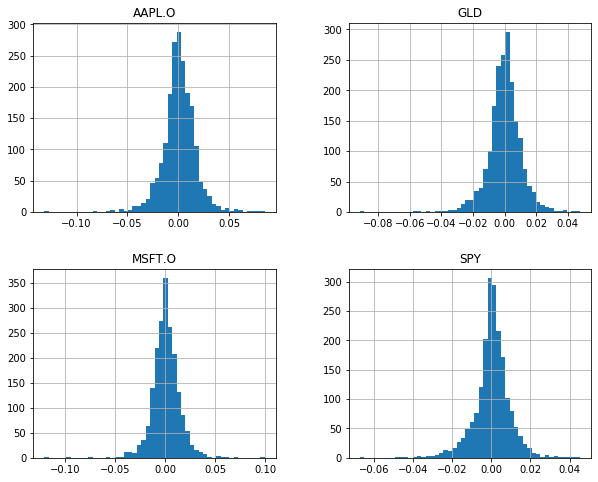

In [81]:
log_returns.hist(bins=50, figsize=(10, 8));

In [82]:

symbols = ['AAPL.O', 'MSFT.O', 'SPY', 'GLD']

In [83]:
noa = len(symbols)

In [84]:
data = raw[symbols]

In [85]:
data

,AAPL.O,MSFT.O,SPY,GLD
Date,,,,
2010-01-04,30.572827,30.950,113.33,109.80
2010-01-05,30.625684,30.960,113.63,109.70
2010-01-06,30.138541,30.770,113.71,111.51
2010-01-07,30.082827,30.452,114.19,110.82
2010-01-08,30.282827,30.660,114.57,111.37
...,...,...,...,...
2017-10-25,156.410000,78.630,255.29,121.35
2017-10-26,157.410000,78.760,255.62,120.33
2017-10-27,163.050000,83.810,257.71,120.90


In [86]:
rets = np.log(data / data.shift(1))

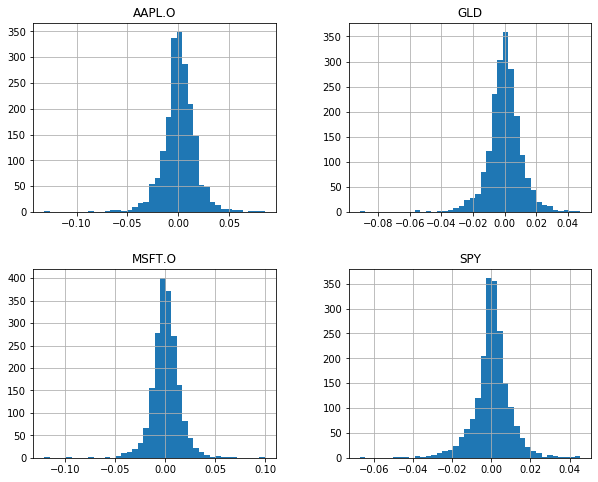

In [87]:
rets.hist(bins=40, figsize=(10, 8));

In [88]:
rets.mean() * 252

AAPL.O    0.218633
MSFT.O    0.126401
SPY       0.104758
GLD       0.012069
dtype: float64

In [89]:
rets.cov() * 252

,AAPL.O,MSFT.O,SPY,GLD
AAPL.O,0.064899,0.022504,0.020903,0.001510
MSFT.O,0.022504,0.050234,0.021608,-0.000426
SPY,0.020903,0.021608,0.021986,0.000002
GLD,0.001510,-0.000426,0.000002,0.027666


In [90]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [91]:
weights

array([0.35253517, 0.2308183 , 0.05583007, 0.36081646])

In [92]:
weights.sum()

1.0000000000000002

In [93]:
np.sum(rets.mean() * weights) * 252

0.1164549067332043

In [94]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))

0.019767825770604066

In [95]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

0.140598100167122

In [96]:
#the following implements a Monte Carlo simulation (see Chapter 12) to generate random portfolio
#weight vectors on a larger scale.

In [97]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [98]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [99]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

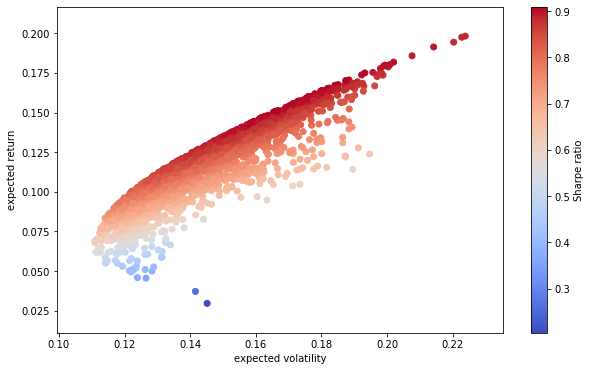

In [102]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');